In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [15]:
from google.colab import files
uploaded = files.upload()

Saving hero_duel.csv to hero_duel (1).csv


In [16]:
df = pd.read_csv('hero_duel.csv')
df.head()

,Game_ID,Turn_Number,Timestamp,Player_ID,Action_Chosen,Player_Level,Player_Rating,Environment,Weather,Used_Special_Move,Player_HP_After,Opponent_HP_After,Player_Stamina_After,Action_Effectiveness,Damage_Taken,Is_Critical_Turn,First_Player,Is_Win,Winner_ID,Total_Turns
0,4000000001,1,2025-05-21T15:40:27.102356,P1,defend,8,1433,castle,foggy,True,100,100,100,0,0,False,P1,True,P1,100
1,4000000001,2,2025-05-21T15:40:32.102356,P2,attack,5,1392,forest,rainy,False,100,82,90,18,18,False,P1,False,P1,100
2,4000000001,3,2025-05-21T15:40:37.102356,P1,attack,1,1623,forest,rainy,False,82,86,90,14,14,False,P1,True,P1,100
3,4000000001,4,2025-05-21T15:40:42.102356,P2,heal,6,1769,volcano,stormy,True,91,82,75,5,0,False,P1,False,P1,100
4,4000000001,5,2025-05-21T15:40:47.102356,P1,heal,1,1915,castle,clear,True,94,91,75,12,0,False,P1,True,P1,100


In [17]:
print(df.describe())
print(df['Action_Chosen'].value_counts())
print(df['Player_ID'].value_counts())


            Game_ID  Turn_Number  Player_Level  Player_Rating  \
count  8.000000e+03  8000.000000   8000.000000    8000.000000   
mean   4.000000e+09    50.500000      5.506750    1495.722250   
std    2.309365e+01    28.867874      2.878583     289.508936   
min    4.000000e+09     1.000000      1.000000    1000.000000   
25%    4.000000e+09    25.750000      3.000000    1245.000000   
50%    4.000000e+09    50.500000      5.500000    1490.000000   
75%    4.000000e+09    75.250000      8.000000    1751.000000   
max    4.000000e+09   100.000000     10.000000    2000.000000   

       Player_HP_After  Opponent_HP_After  Player_Stamina_After  \
count      8000.000000        8000.000000            8000.00000   
mean         62.357875          60.866375              19.37625   
std          27.769623          27.484390              26.07769   
min           0.000000           0.000000               0.00000   
25%          43.000000          42.000000               5.00000   
50%         

<ipython-input-18-32a0fda85928>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Action_Chosen', palette='Set2')


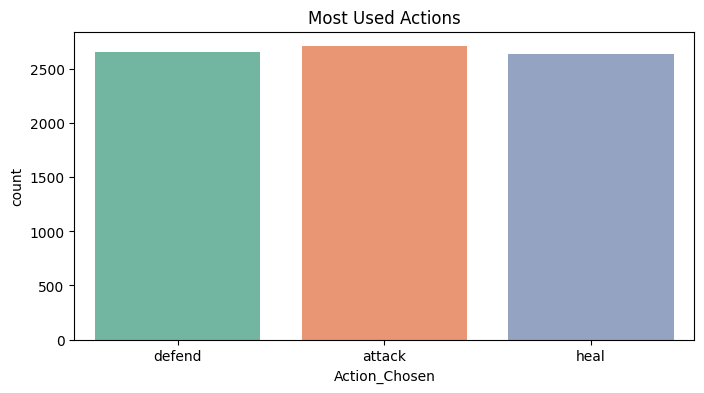

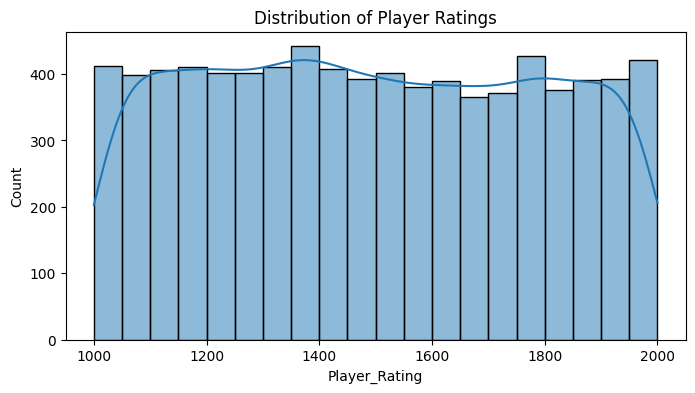

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Action_Chosen', palette='Set2')
plt.title('Most Used Actions')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Player_Rating', bins=20, kde=True)
plt.title('Distribution of Player Ratings')
plt.show()

In [19]:
features = ['Player_Level', 'Player_Rating', 'Action_Effectiveness', 'Used_Special_Move']
df['Used_Special_Move'] = df['Used_Special_Move'].astype(bool).astype(int)
df['Is_Win'] = df['Is_Win'].astype(bool).astype(int)

X = df[features]
y = df['Is_Win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [21]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.89      0.63       791
           1       0.49      0.11      0.17       809

    accuracy                           0.49      1600
   macro avg       0.49      0.50      0.40      1600
weighted avg       0.49      0.49      0.40      1600

Accuracy: 0.4925


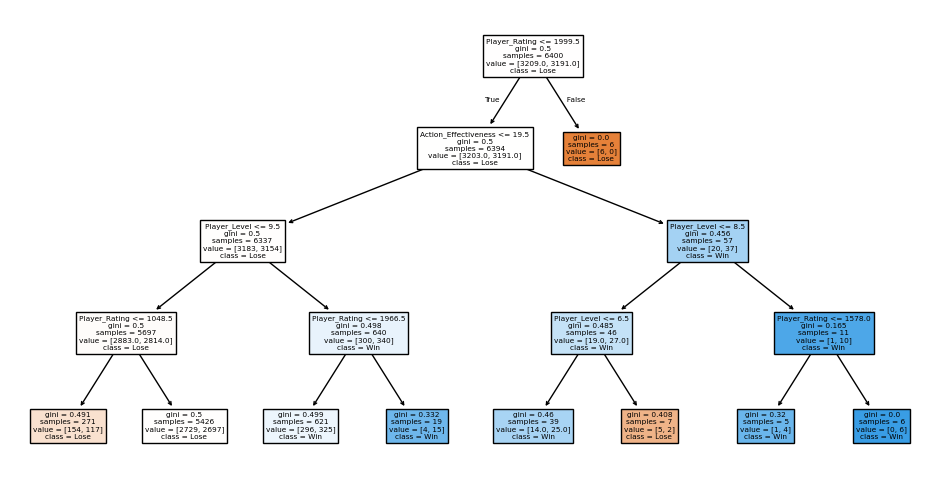

In [22]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=features, class_names=['Lose', 'Win'], filled=True)
plt.show()

In [2]:
!pip install streamlit -q
!pip install pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.4 MB/s eta 0:00:00


In [3]:
!ngrok config add-authtoken "1teqEyKWMhx3yoYqlJ9P3kfwDq0_75zkWrmrQuSASTyNLByQe"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [4]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

st.set_page_config(page_title="Hero Duel Game Analysis", layout="wide")
st.title("Hero Duel Game Data Analysis")

uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.success("File loaded successfully!")

    st.subheader("Raw Data")
    st.dataframe(df.head(10))

    st.subheader("Most Used Actions")
    fig1, ax1 = plt.subplots()
    sns.countplot(data=df, x="Action_Chosen", ax=ax1, palette="Set2")
    st.pyplot(fig1)

    st.subheader("Player Rating Distribution")
    fig2, ax2 = plt.subplots()
    sns.histplot(df['Player_Rating'], bins=20, kde=True, ax=ax2)
    st.pyplot(fig2)

    st.subheader("Win Rate by Player")
    win_counts = df[df['Is_Win'] == True]['Player_ID'].value_counts()
    fig3, ax3 = plt.subplots()
    win_counts.plot(kind='bar', color=['#3498db', '#2ecc71'], ax=ax3)
    ax3.set_title("Win Count by Player")
    st.pyplot(fig3)

    st.subheader("Decision Tree: Predicting Win")
    df['Used_Special_Move'] = df['Used_Special_Move'].astype(bool).astype(int)
    df['Is_Win'] = df['Is_Win'].astype(bool).astype(int)
    features = ['Player_Level', 'Player_Rating', 'Action_Effectiveness', 'Used_Special_Move']
    X = df[features]
    y = df['Is_Win']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = DecisionTreeClassifier(max_depth=4)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    st.write(f"Model Accuracy: {accuracy:.2f}")

    fig4, ax4 = plt.subplots(figsize=(12, 6))
    plot_tree(model, feature_names=features, class_names=["Lose", "Win"], filled=True, ax=ax4)
    st.pyplot(fig4)

Writing app.py


In [5]:
!rm -rf /root/.ngrok2


In [6]:
!ngrok config add-authtoken "1teqEyKWMhx3yoYqlJ9P3kfwDq0_75zkWrmrQuSASTyNLByQe"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [7]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Your Streamlit app is live at:", public_url)

!streamlit run app.py &> /dev/null &

Your Streamlit app is live at: NgrokTunnel: "https://873f-34-55-25-11.ngrok-free.app" -> "http://localhost:8501"
